In [3]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [4]:
# Read in muffin and cupcake ingredient data
df = pd.read_csv('Muffins_Cuppcakes.csv')
df = df.iloc[:,1:]
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


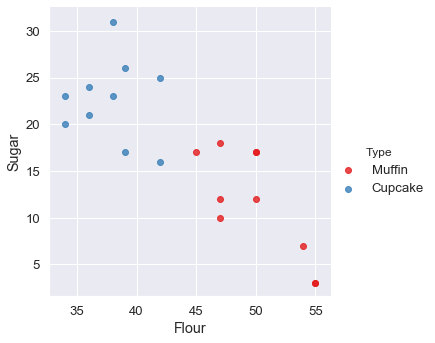

In [7]:
# Plot two ingredients

sns.lmplot('Flour', 'Sugar', data=df, hue='Type',palette='Set1', fit_reg=False)
#sns.scatterplot('Flour', 'Sugar', data=df, hue='Type',palette='Set1')

In [4]:
# Specify inputs for the model
ingredients = df[['Flour','Sugar']] #### ------------ x

#converting the columns from text to 0-1
type_label = np.where(df['Type']=='Muffin', 0, 1) #### -------- y

In [5]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)
model.coef_

array([[-6.66503014e-01, -7.77156117e-16]])

In [6]:
model.intercept_[0]

28.992962922374236

In [7]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

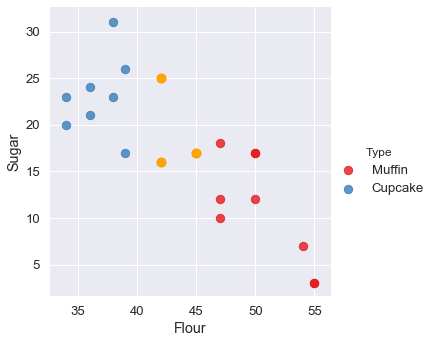

In [8]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=df, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='orange')

In [9]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    
    if(model.predict([[flour, sugar]]))==0:
    
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [10]:
# Predict if 35 parts flour and 10 parts sugar
muffin_or_cupcake(35, 10)

You're looking at a cupcake recipe!


C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
